# Results of the pipeline

903


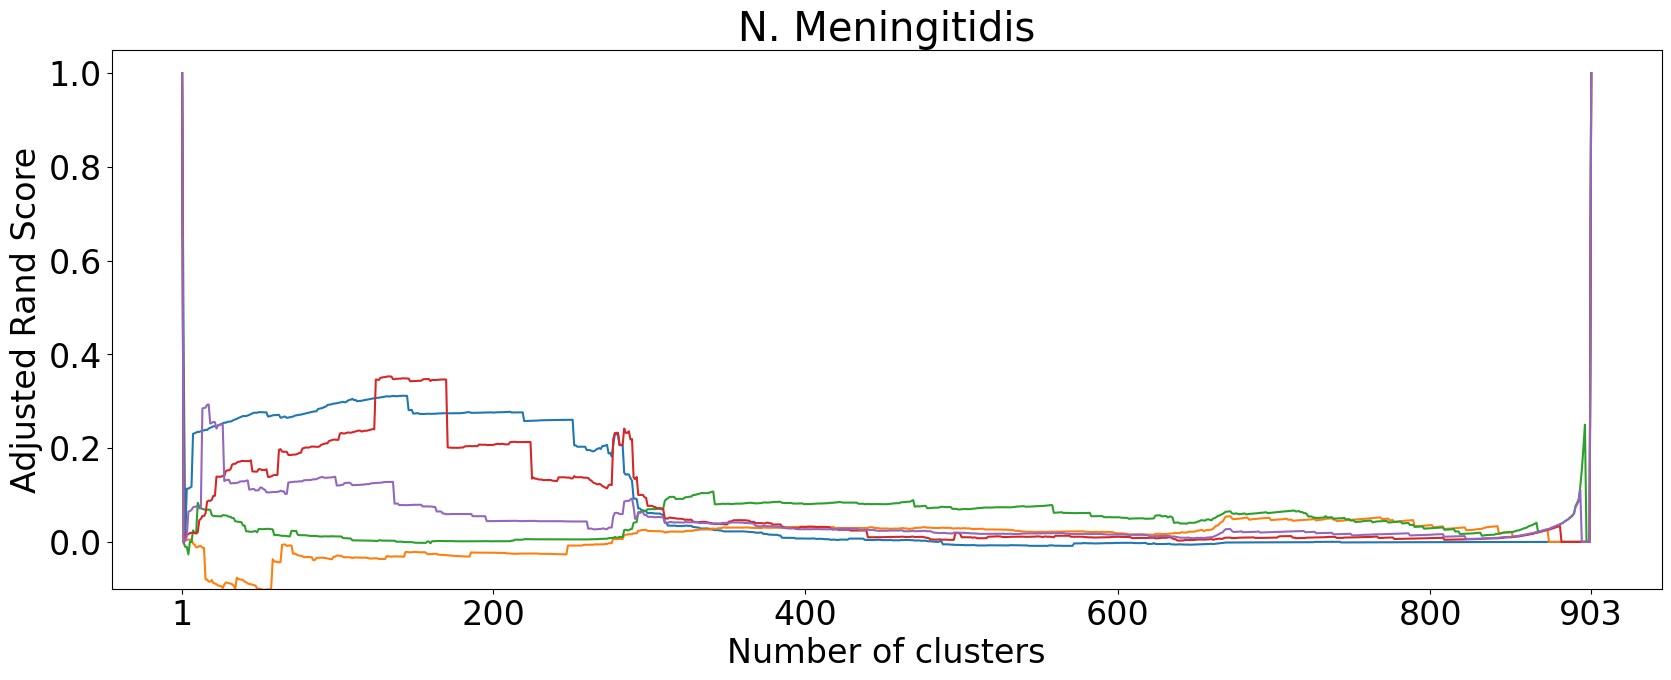

dnabert    seqvec     prose  alphafold       esm
combiner dimensional PCA                                                   
pca      10               0.014083  0.066408  0.071943   0.114722  0.013394
         50               0.042559  0.100818  0.072008   0.203349  0.054259
         all              0.037470  0.110132  0.072008   0.197384  0.054393
average  10               0.066780  0.022296  0.076970   0.124797  0.022441
         50               0.196914  0.046481  0.077492   0.194256  0.121570
         all              0.196821  0.031619  0.077527   0.188283  0.119142
sum      10               0.004728  0.003783  0.052911   0.008873  0.008565
         50               0.007106  0.005514  0.052654   0.008845  0.009212
         all              0.006834  0.002164  0.052640   0.009405  0.005522
max      10               0.076643  0.008417  0.078901   0.093310  0.014583
         50               0.215881  0.011371  0.082775   0.163537  0.032164
         all              0.276243  0.008957  0.081589   0.213103  0.049330

In [3]:
import sys
sys.path.append('..')
import pickle
from autoembedding.results_manager import results2table
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

PATH = '/storagenfs/m.tolloso/BioEmbedding/results/enrichment_results_bacterium.pkl'

results = pickle.load(open(PATH, "rb"))
r, best_lst, results_dict_ars = results2table(
    results, 
    embedders= [
        "dnabert", 
        "seqvec", 
        "prose", 
        "alphafold", 
        "esm"
        ],
    combiners = ["pca", "average", "sum", "max"],
    pcas = [ '10', '50', 'all'],

    
    preferred_metric_embedding="euclidean", 
    preferred_method_embedding="average", 
    
    preferred_metric_gt="euclidean", # euclidean, average: equivalent to UPGMA when the gt is the distance matrix
    preferred_method_gt="average",
    
    preferred_edge_weight="overlap",
    preferred_annotation="go"
)
# r.to_latex("./latex_output.tex")

fig, _ = plt.subplots(figsize=(20, 7))
fontsize = 24
plt.rcParams['font.size'] = f'{fontsize}'

plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Score")
plt.title("N. Meningitidis")

plt.ylim(-0.1, 1.05)

X = [i for i in range(len(best_lst), 0, -1)]
print(len(best_lst))

plt.xticks([i for i in range(0, len(best_lst)+1, 200)][1:] + [1] + [len(best_lst)])

plt.plot(X, results_dict_ars['max']['all']['dnabert'], label='dnabert')
plt.plot(X, results_dict_ars['average']['50']['seqvec'], label='seqvec')
plt.plot(X, results_dict_ars['max']['50']['prose'], label='prose')
plt.plot(X, results_dict_ars['max']['all']['alphafold'], label='alphafold')
plt.plot(X, results_dict_ars['average']['50']['esm'], label='esm')
# plt.legend(loc = "upper left")
plt.show()
fig.savefig(Path(PATH).stem + '.eps')
r
